In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import ElasticNet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the CSV files

In [2]:
# Specify the path to your .names file
file_path = 'winequality.names'

try:
    with open(file_path, 'r') as file:
        # Read the contents of the file
        file_contents = file.read()
        
    # Now, you can work with the contents of the file as a string
    print(file_contents)

except FileNotFoundError:
    print(f"The file '{file_path}' was not found.")

except Exception as e:
    print(f"An error occurred: {e}")


Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [3]:
white_df = pd.read_csv('winequality-white.csv', delimiter=';')
red_df = pd.read_csv('winequality-red.csv', delimiter=';')

In [4]:
white_df['wine_type'] = 'white'
red_df['wine_type'] = 'red'

In [5]:
df = pd.concat([white_df, red_df], ignore_index=True)

In [6]:
print(df.shape)
df.head()

(6497, 13)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_type  
0      8.8        6     white  
1      9.5        6     white  
2     10.1        6     white  
3      9.9        6     white  
4      9.9        6     white

In [52]:
numerical_attrs = []
nominal_attrs = []
categorical_attrs = []

for column_name, series in df.items():
    dtype = series.dtype
    if dtype == 'float64':
        numerical_attrs.append(column_name)
    elif dtype == 'object':
        nominal_attrs.append(column_name)
    elif dtype == 'int64':
        categorical_attrs.append(column_name)

print("Numerical attributes:")
print(', '.join(numerical_attrs))

print("\nNominal attributes:")
print(', '.join(nominal_attrs))

print("\nCategorical attributes:")
print(', '.join(categorical_attrs))


Numerical attributes:
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol

Nominal attributes:
wine_type

Categorical attributes:
quality


In [53]:
column_name = 'quality'

nan_count = df[column_name].isna().sum()

print(f"Number of NaN values in column '{column_name}': {nan_count}")

Number of NaN values in column 'quality': 0


In [54]:
threshold = len(df) * 0.2
df.dropna(axis=1, thresh=threshold, inplace=True)
print(df.shape)
print(df)

(6497, 13)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfu

In [55]:
X = df.drop(columns=['quality'])  # Features (all columns except 'quality')
y = df['quality']  # Target variable ('quality')

In [56]:

# Split the data into a training set and a test set with a 20% test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the test set to storage (e.g., as a CSV file)
X_test.to_csv('test_set.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

# Delete the test set and the original data frame to free up memory
del X_test, y_test#, df
#maybe should just make one dataframe to export?

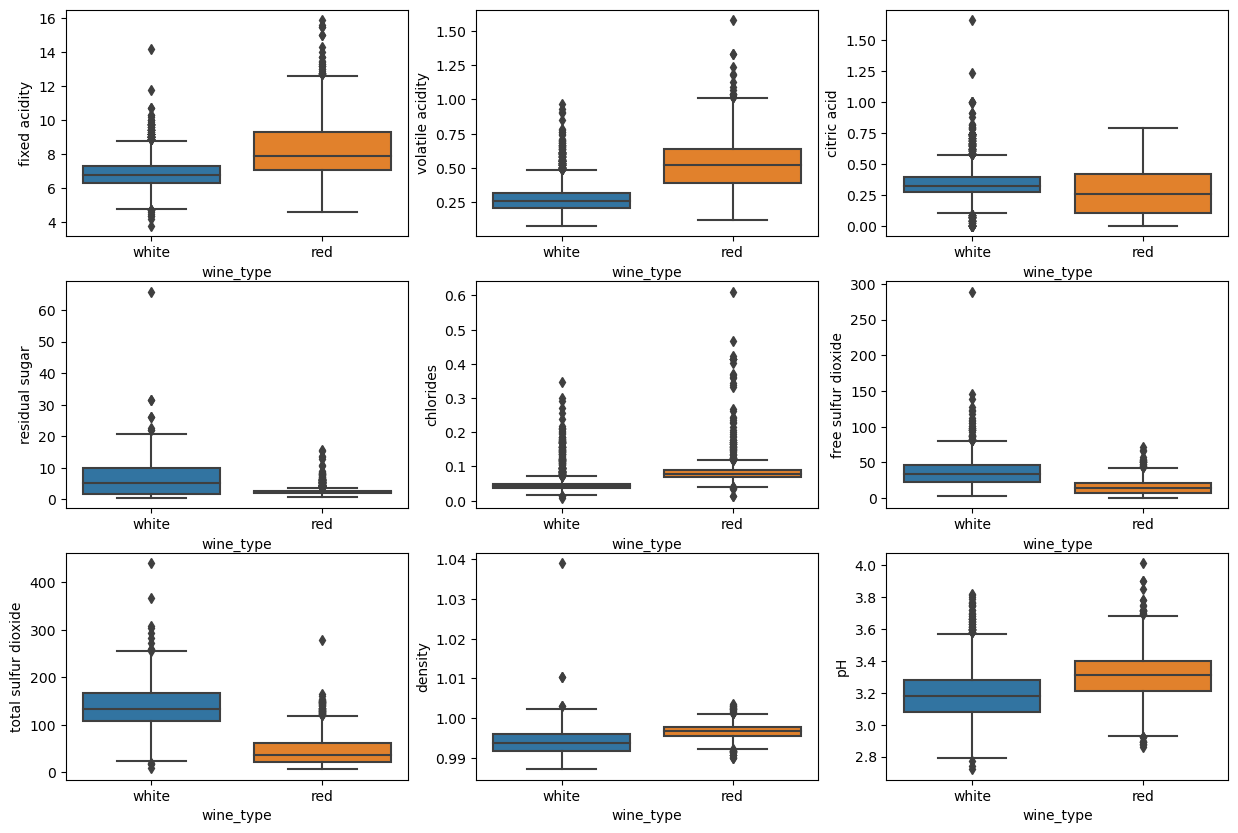

In [111]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(numerical_attrs, ax.flatten()):
    if var != 'quality':  # Make sure the current variable isn't 'Quality'
        sns.boxplot(x='wine_type', y=var, data=X_train, ax=subplot)


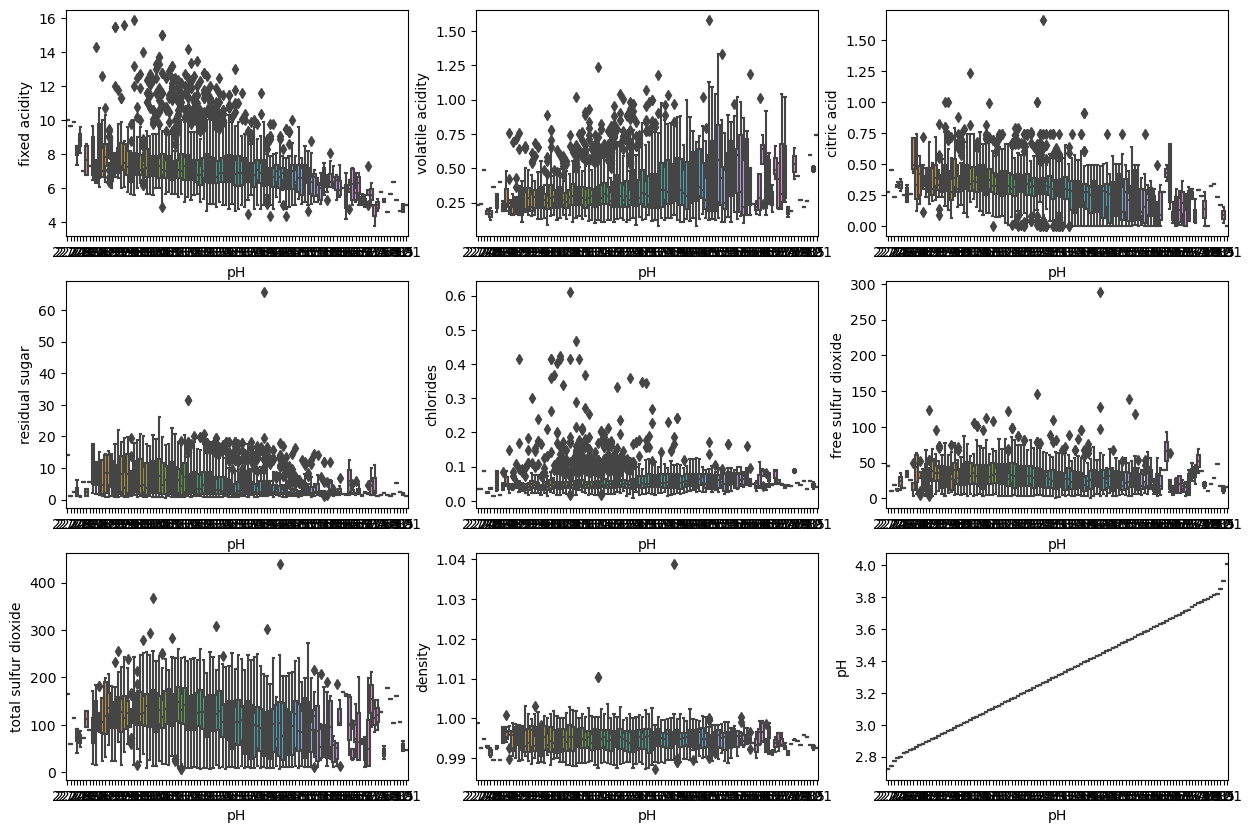

In [112]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(numerical_attrs, ax.flatten()):
    if var != 'Quality':  # Make sure the current variable isn't 'Quality'
        sns.boxplot(x='pH', y=var, data=X_train, ax=subplot)


•for citric acid: Beyond quality '7', the trend doesn't hold as consistently.

•for Free Sulfur Dioxide: Wines with a quality rating of '8' seem to have a smaller interquartile range compared to others.

•for Total Sulfur Dioxide: A lot of outliers are present, especially for wines of quality '6' and '7'.

•for PH: There are several outliers for wines with quality ratings '5' and '6'.

***Overall:***

•Certain attributes like volatile acidity, chlorides, and total sulfur dioxide seem to have a clearer correlation with wine quality, with their medians tending to decrease as wine quality increases.

•Attributes such as fixed acidity, residual sugar, and pH don't show a very clear trend with respect to wine quality.

•There are several outliers in many of the attributes, indicating some wines have unusual characteristics for their quality rating.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


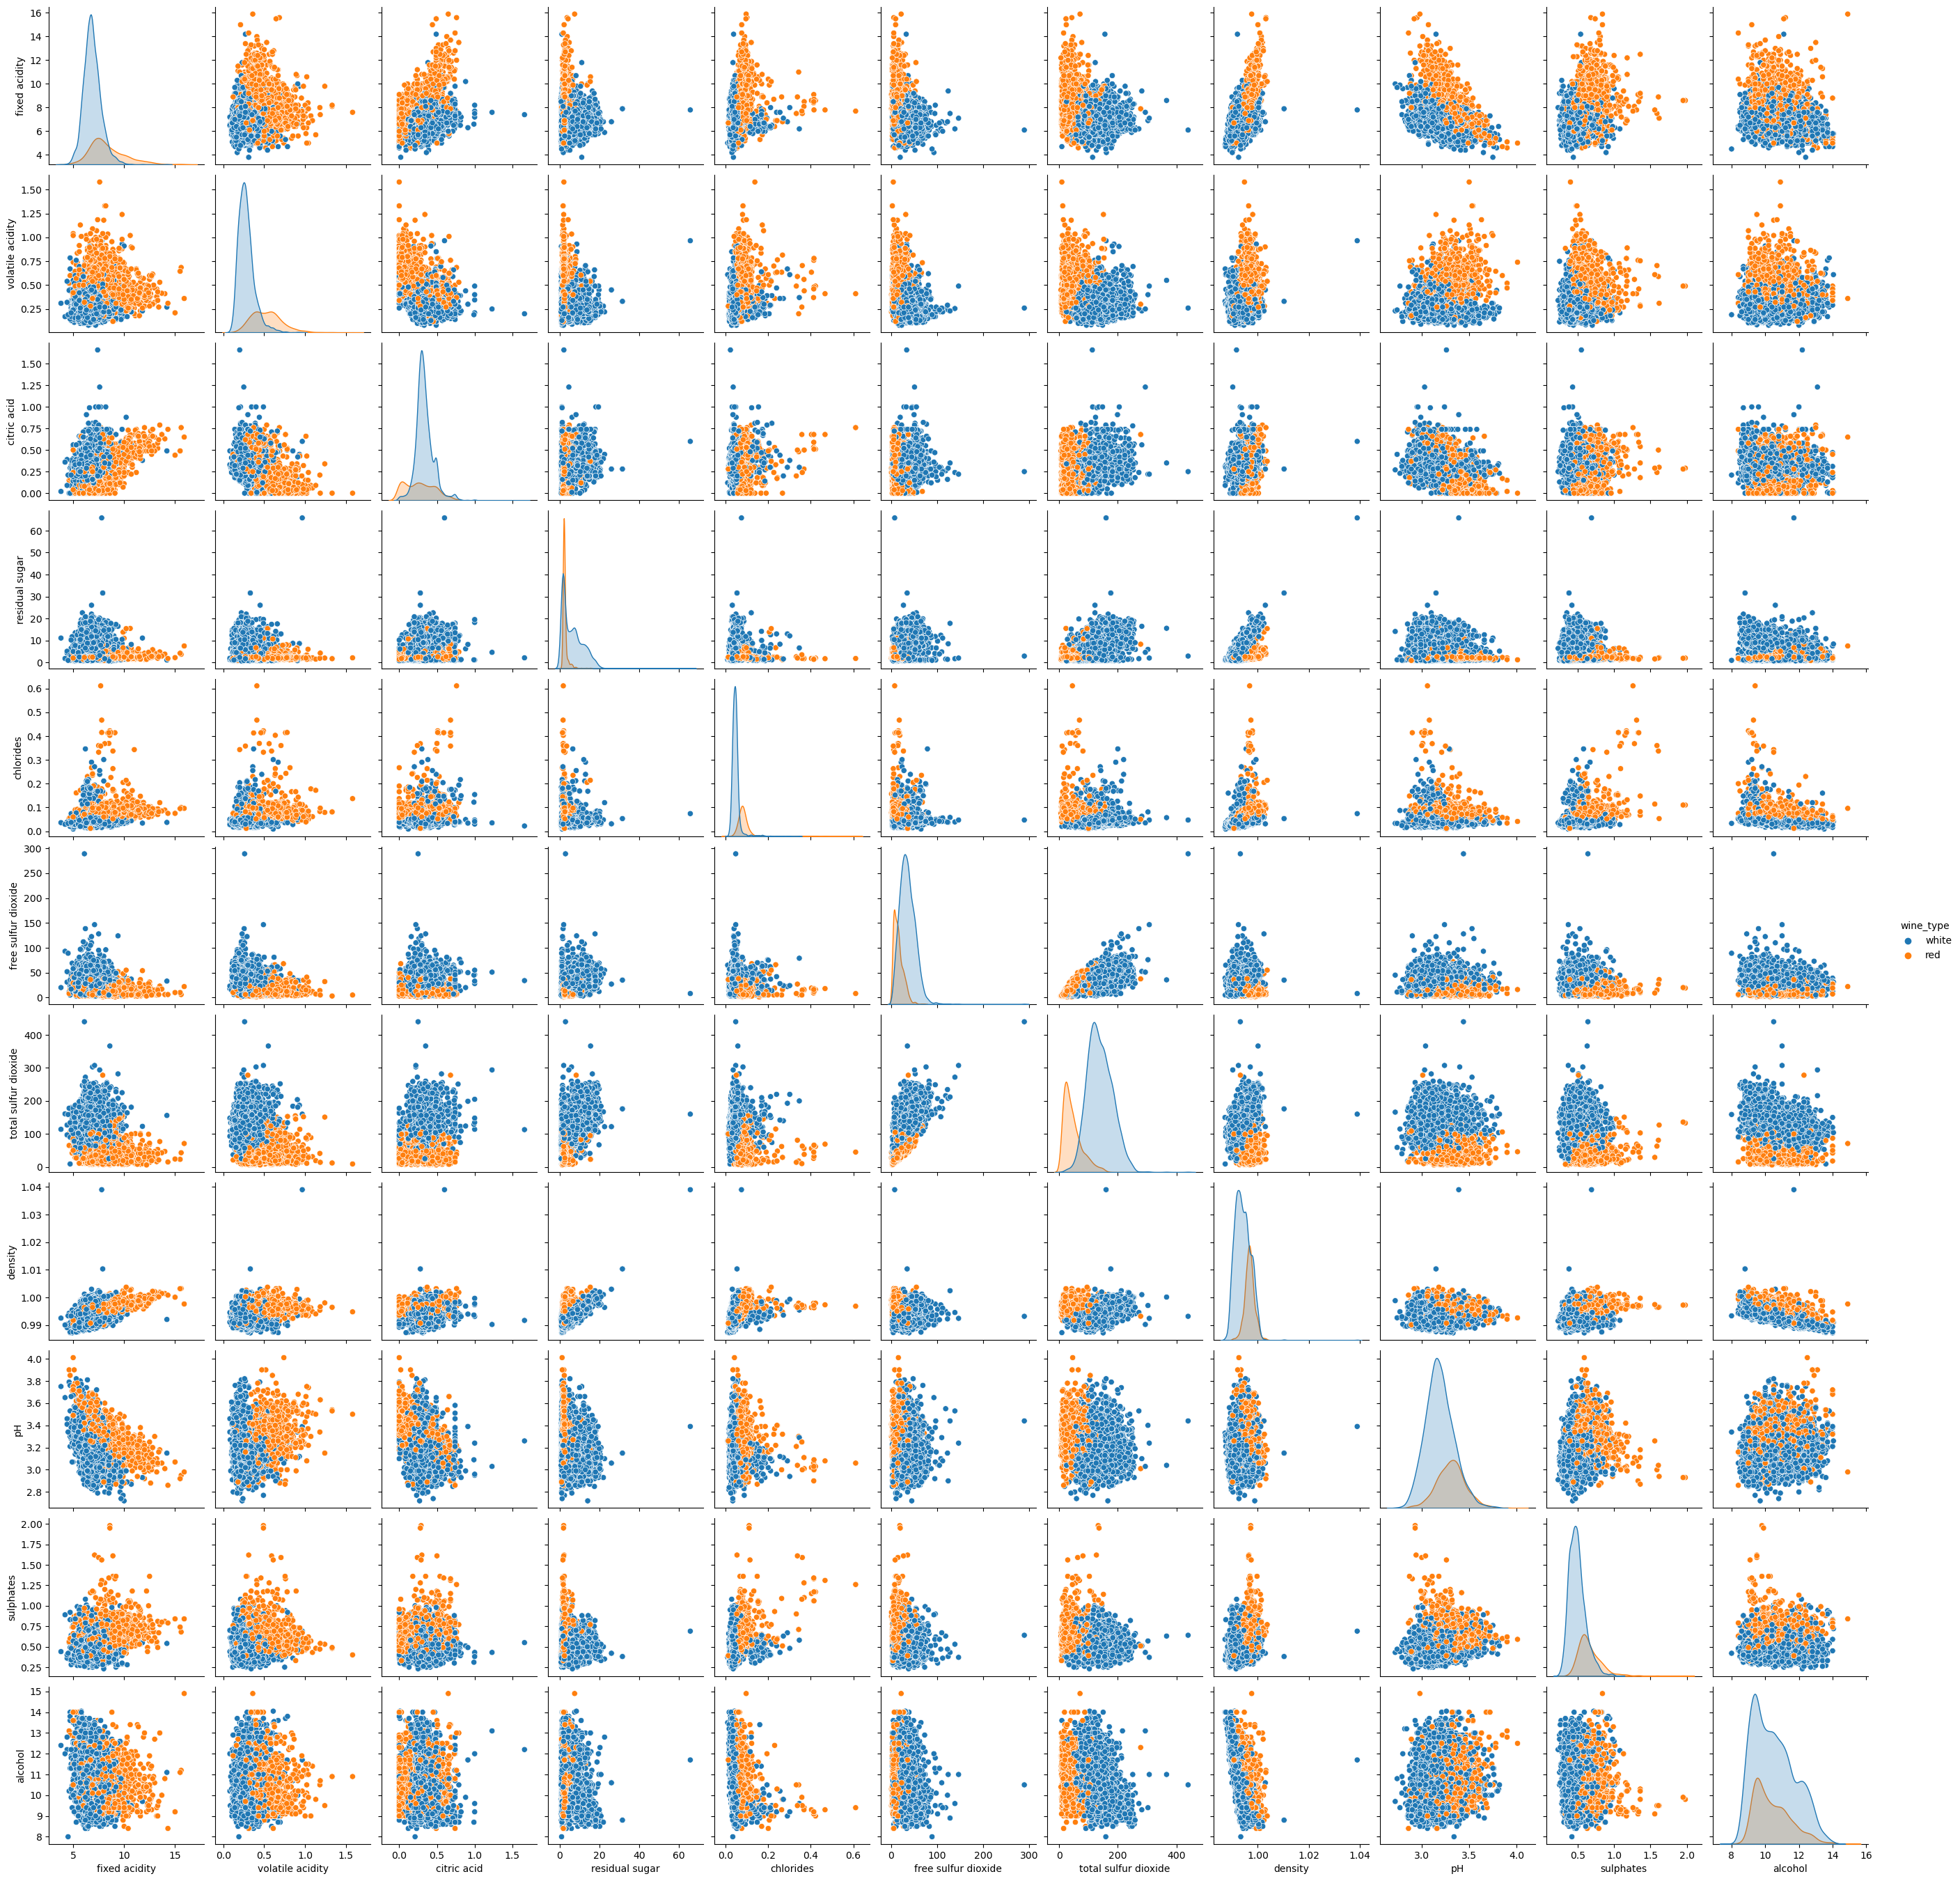

In [114]:
sns.pairplot(X_train, hue='wine_type')  # 'hue' is optional, used to color by a categorical variable

# Display the plot
plt.show()

In [116]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type'],
      dtype='object')

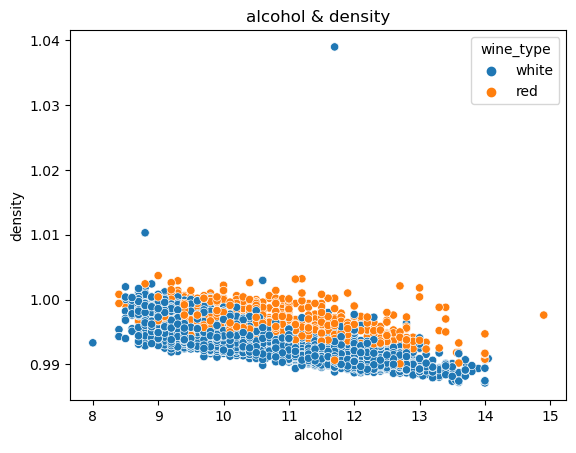

In [125]:
sns.scatterplot(x='alcohol', y='density', data=X_train, hue='wine_type')

# Add title and labels
plt.title('alcohol & density')
plt.xlabel('alcohol')
plt.ylabel('density')

# Show the plot
plt.show()

## How do red and white wines compair for Fixed acidity

<Axes: xlabel='wine_type', ylabel='quality'>

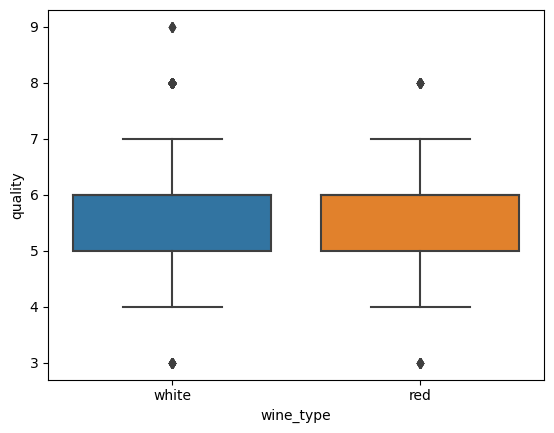

In [59]:
sns.boxplot(x='wine_type', y='quality', data=df)

## explore the data

In [60]:
X_data_types = X_train.dtypes
y_data_types = y_train.dtypes
print(X_data_types)
print(y_data_types)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
wine_type                object
dtype: object
int64


In [61]:
stats_df = X_train.describe()
stats_df 

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5197.000000       5197.000000  5197.000000     5197.000000   
mean        7.225120          0.339985     0.319394        5.424514   
std         1.307621          0.165723     0.145111        4.783221   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        2.900000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5197.000000          5197.000000           5197.000000  5197.000000   
mean      0.055919            30.511064            115.650952     0.994698   
std       0.034038            17.818109             56.619632     0.003006   
min       0.009000             1.000000              6.000000     0.987130   
25%       0.038000            17.000000             77.000000     0.992350   
50%       0.047000            29.000000            118.000000     0.994880   
75%       0.065000            41.000000            156.000000     0.996920   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  5197.000000  5197.000000  5197.000000  
mean      3.218488     0.533465    10.493653  
std       0.161035     0.151056     1.192345  
min       2.720000     0.230000     8.000000  
25%       3.110000     0.430000     9.500000  
50%       3.210000     0.510000    10.300000  
75%       3.320000     0.600000    11.300000  
max       4.010000     1.980000    14.900000


attr: fixed acidity
kurtosis: 4.97830540132766
skewness: 1.7192393837170765


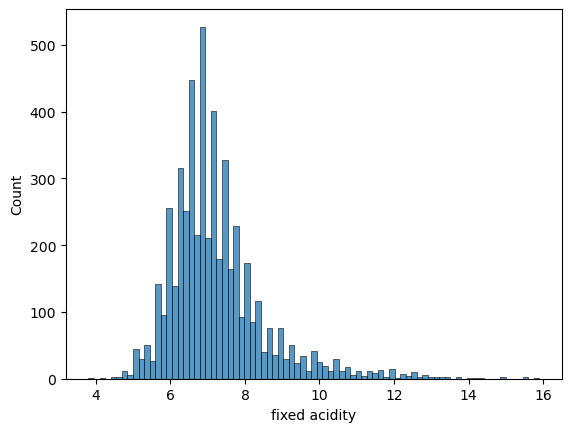

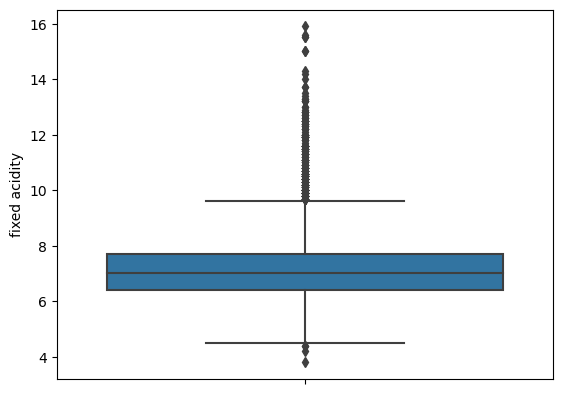


attr: volatile acidity
kurtosis: 3.08714785634162
skewness: 1.5468681607252028


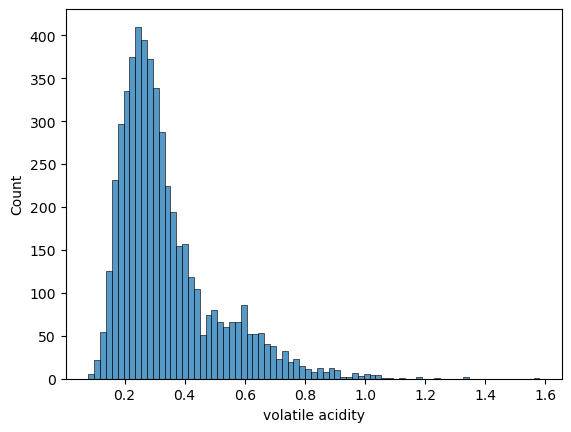

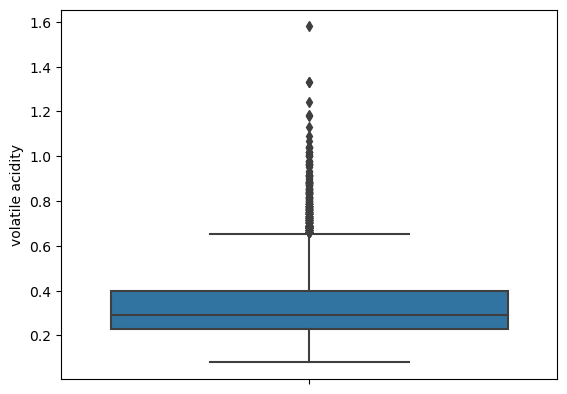


attr: citric acid
kurtosis: 2.7046200580268143
skewness: 0.5107578783377904


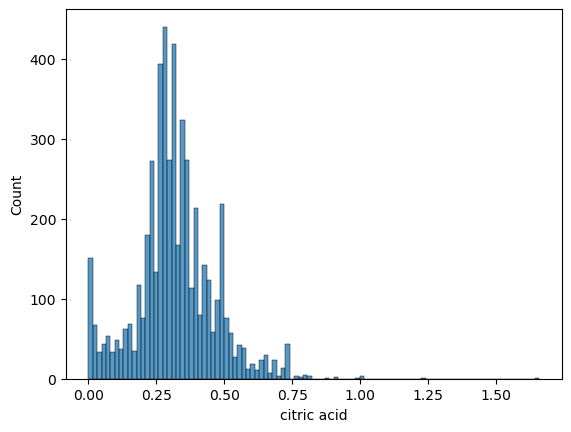

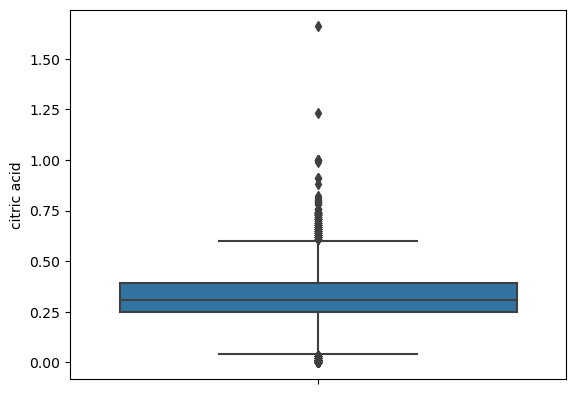


attr: residual sugar
kurtosis: 5.304374531520008
skewness: 1.518132897248272


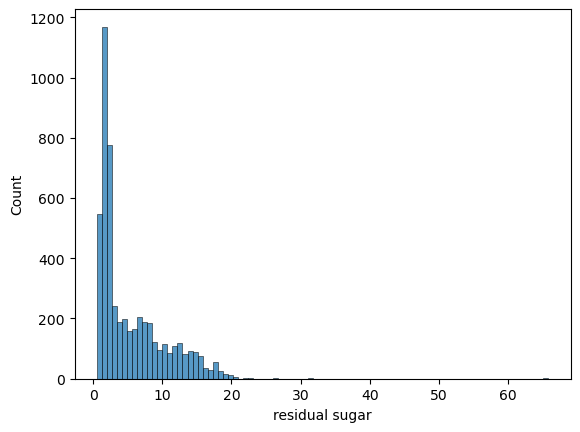

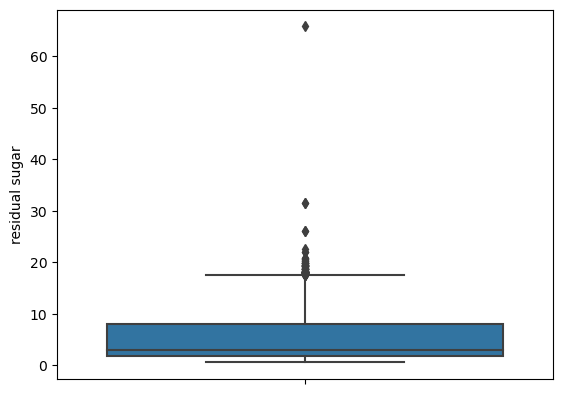


attr: chlorides
kurtosis: 48.22519606039104
skewness: 5.237898382850012


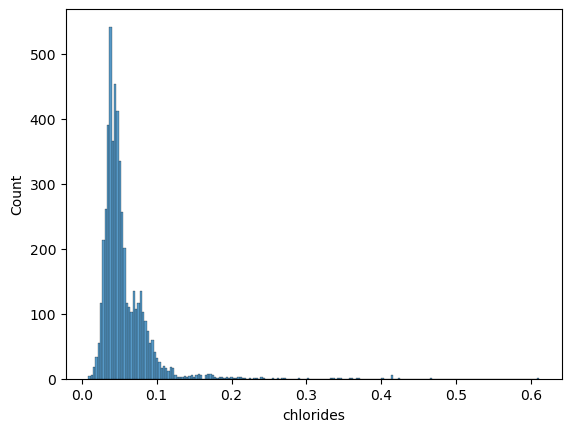

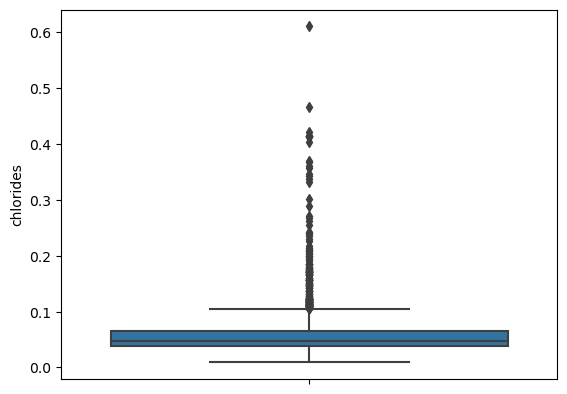


attr: free sulfur dioxide
kurtosis: 9.532350303978536
skewness: 1.33729854620383


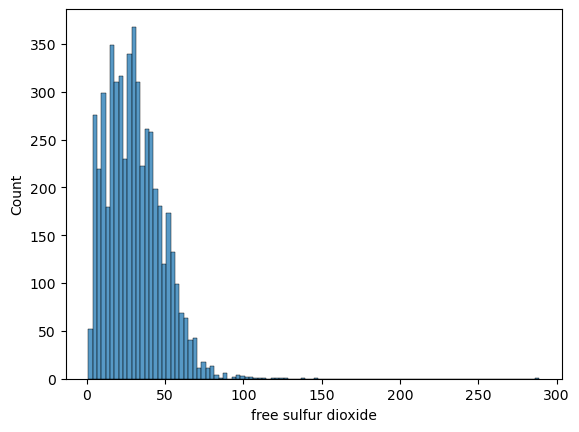

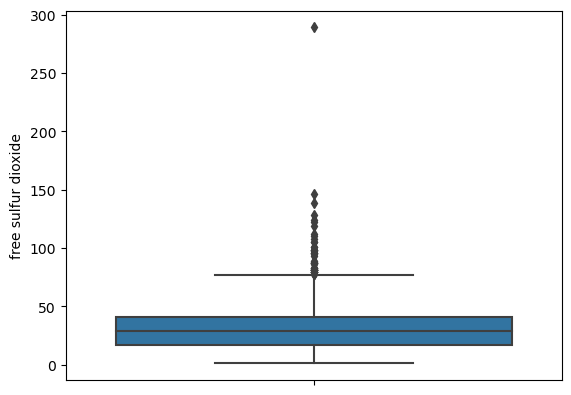


attr: total sulfur dioxide
kurtosis: -0.3824246141261458
skewness: -0.005992079554442105


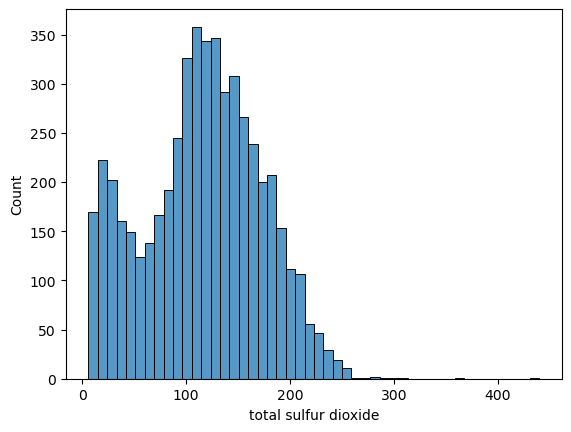

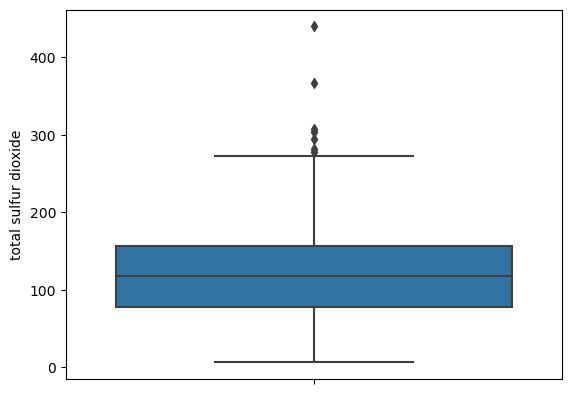


attr: density
kurtosis: 8.366255767755451
skewness: 0.6341433197851113


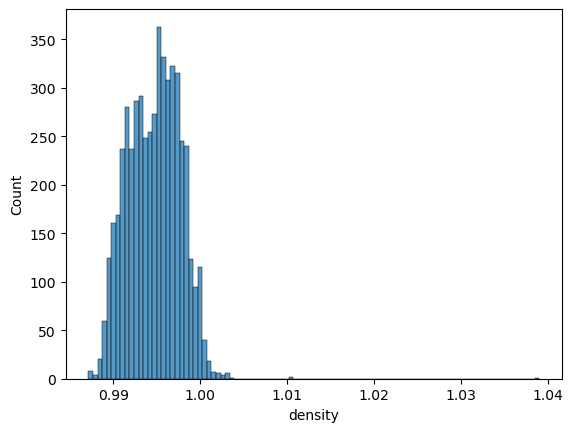

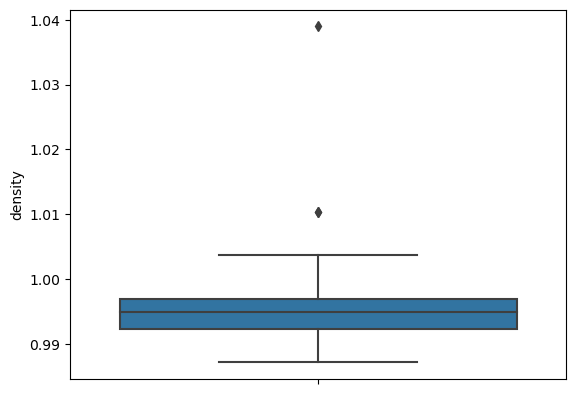


attr: pH
kurtosis: 0.35929530061005766
skewness: 0.37474401165898985


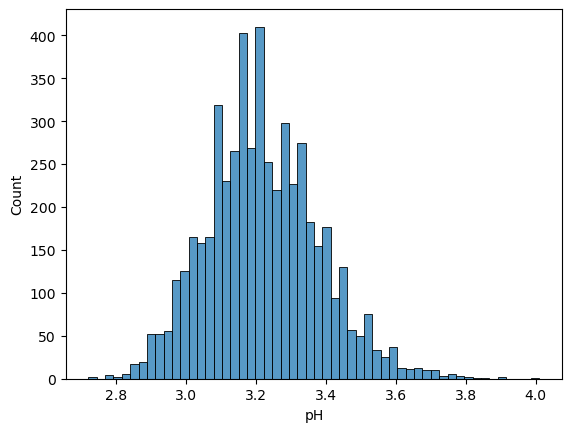

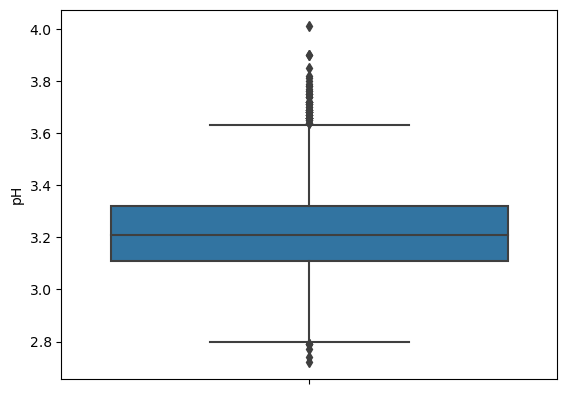


attr: sulphates
kurtosis: 8.124899445851325
skewness: 1.780117225054258


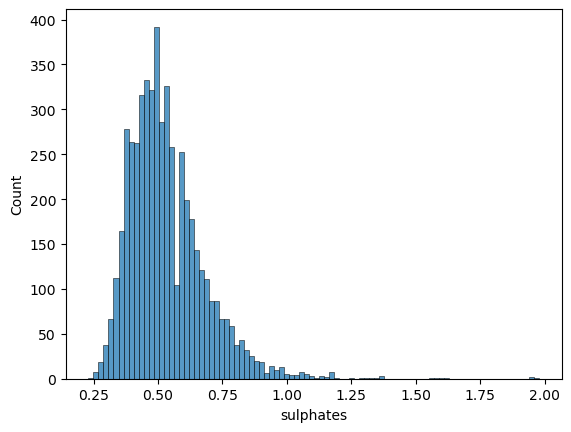

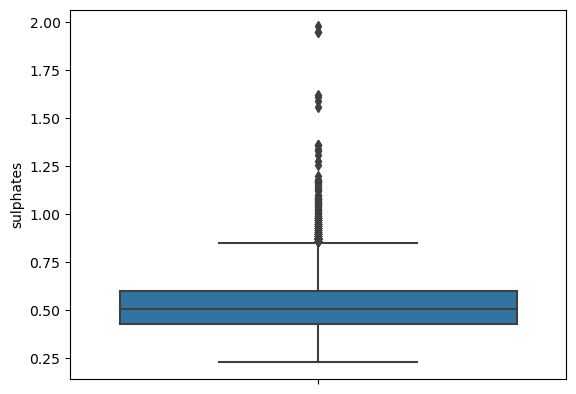


attr: alcohol
kurtosis: -0.5034039549725469
skewness: 0.5710053533312172


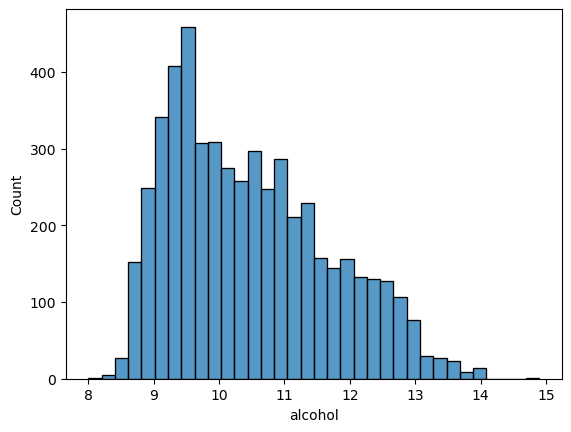

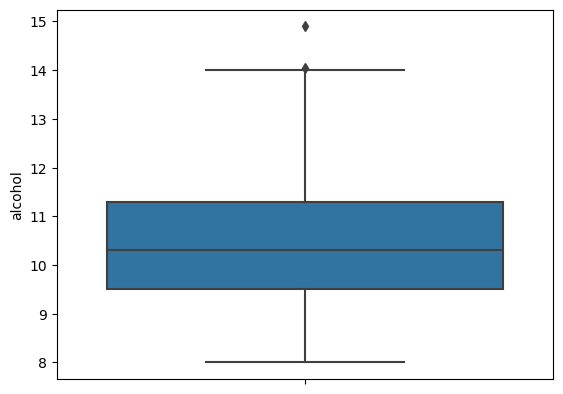

In [62]:
X_train_d_w = X_train.drop('wine_type', axis=1)
for attr in X_train_d_w.columns:
    print('\nattr: ', attr, sep='')
    print(f'kurtosis: {X_train_d_w[attr].kurtosis()}')
    print(f'skewness: {X_train_d_w[attr].skew()}')
    missingness = X_train_d_w[attr].isna().sum()/X_train_d_w.shape[0]
    if missingness > 0.15:
        drop_list.append(attr)
    sns.histplot(data=X_train_d_w, x=X_train_d_w[attr])
    plt.show()
    sns.boxplot(data=X_train_d_w, y=X_train_d_w[attr])
    plt.show()



# VIF


In [63]:
def get_vif_df(a_df):
    vif_df = pd.DataFrame()
    vif_df['vars'] = a_df.columns
    vif_df['vif'] = [variance_inflation_factor(a_df.values, i) for i in range(a_df.shape[1])]
    return vif_df

In [64]:
def prep_for_modeling(df, response, vif_drop=None, not_stat_sig_drop=None):
    
    if vif_drop is None:
        vif_drop = []
        
    if not_stat_sig_drop is None:
        not_stat_sig_drop = []
        
    predictors = [attr for attr in df.columns 
                  if attr != response and attr not in vif_drop and attr not in not_stat_sig_drop]
    
    print(f'predictors: {predictors}')
    print(f'response: {response}')
    print(f'vif_drop: {vif_drop}')
    print(f'not_stat_sig_drop: {not_stat_sig_drop}')
    
    train_cap_x_df = df.loc[:, predictors]
    
    if response in df.columns:
        train_y_df = df.loc[:, response]
    else:
        print(f"Error: Response column '{response}' not found in the dataframe.")
        return None, None
    
    return train_cap_x_df, train_y_df


In [65]:
response = 'quality'
train_cap_x_df, train_y_df = prep_for_modeling(df, response)

predictors: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type']
response: quality
vif_drop: []
not_stat_sig_drop: []


In [66]:
train_cap_x_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol wine_type  
0         8.8     white  
1         9.5     white  
2        10.1     white  
3         9.9     white  
4         9.9     white  
...       ...       ...  
6492     10.5       red  
6493     11.2       red  
6494     11.0       red  
6495     10.2       red  
6496     11.0       red  

[6497 rows x 12 columns]

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns
numeric_columns = train_cap_x_df.select_dtypes(include=['float64', 'int64'])

# Calculate VIF for numeric columns
vif_df = pd.DataFrame()
vif_df['vars'] = numeric_columns.columns
vif_df['vif'] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

# Display the VIF DataFrame
print(vif_df)


                    vars         vif
0          fixed acidity   58.897405
1       volatile acidity    8.943681
2            citric acid    9.340251
3         residual sugar    3.576148
4              chlorides    5.575434
5    free sulfur dioxide    8.452180
6   total sulfur dioxide   14.732237
7                density  936.984064
8                     pH  589.005172
9              sulphates   18.491253
10               alcohol  107.135452


In [68]:
cap_x_df = train_cap_x_df.loc[:, 'density'].to_frame()
cap_x_df.head()

density
0   1.0010
1   0.9940
2   0.9951
3   0.9956
4   0.9956

In [69]:
y_df = train_cap_x_df.loc[:, 'pH'].to_frame()
y_df

pH
0     3.00
1     3.30
2     3.26
3     3.19
4     3.19
...    ...
6492  3.45
6493  3.52
6494  3.42
6495  3.57
6496  3.39

[6497 rows x 1 columns]

In [70]:
train_cap_x_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45       0.58   
6493                 39.0                  51.0  0.99512  3.52       0.76   
6494                 29.0                  40.0  0.99574  3.42       0.75   
6495                 32.0                  44.0  0.99547  3.57       0.71   
6496                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol wine_type  
0         8.8     white  
1         9.5     white  
2        10.1     white  
3         9.9     white  
4         9.9     white  
...       ...       ...  
6492     10.5       red  
6493     11.2       red  
6494     11.0       red  
6495     10.2       red  
6496     11.0       red  

[6497 rows x 12 columns]

## Add in constants & keep density

In [106]:
import statsmodels.api as sm
train_cap_x_df_drop_cat = train_cap_x_df.drop(columns=['wine_type'])

get_vif_df(sm.add_constant(train_cap_x_df_drop_cat))

vars           vif
0                  const  1.699783e+06
1          fixed acidity  4.896925e+00
2       volatile acidity  1.949413e+00
3            citric acid  1.608220e+00
4         residual sugar  7.228979e+00
5              chlorides  1.631958e+00
6    free sulfur dioxide  2.135481e+00
7   total sulfur dioxide  2.937601e+00
8                density  1.591450e+01
9                     pH  2.536522e+00
10             sulphates  1.541526e+00
11               alcohol  4.782130e+00

Now the VIFs are bellow 10

In [72]:
# sns.pairplot(X_train)
# plt.show()

/var/folders/fv/ylt49d811fd5h8rbs2lssjl80000gn/T/ipykernel_95268/780067982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


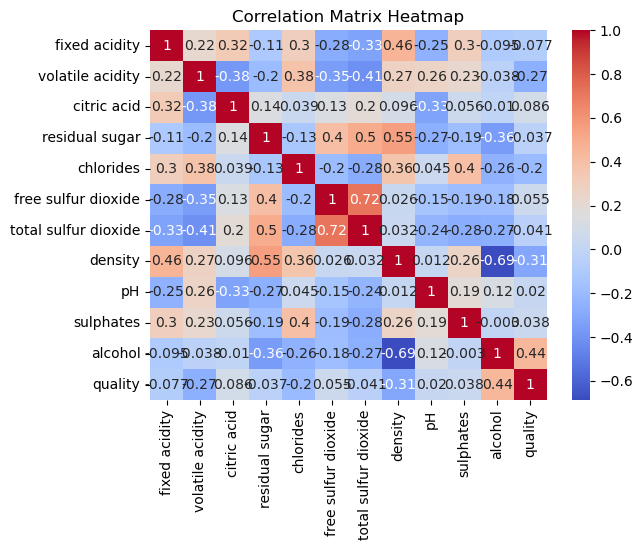

In [73]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

/var/folders/fv/ylt49d811fd5h8rbs2lssjl80000gn/T/ipykernel_95268/3192337553.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


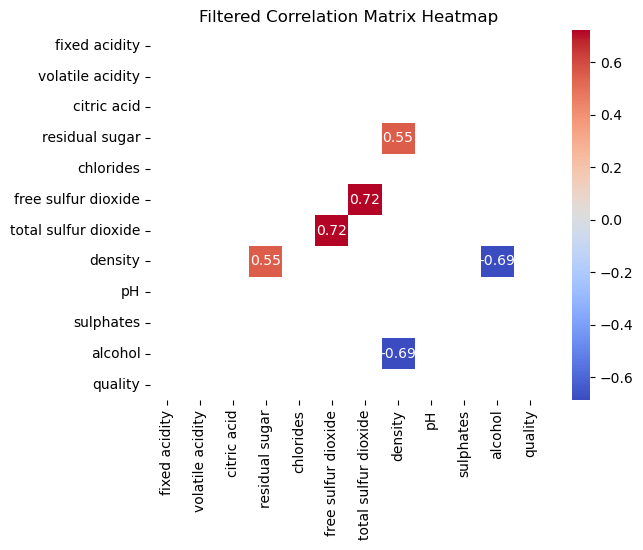

In [74]:

# Compute the correlation matrix
corr_matrix = df.corr()

# Filter the matrix to only show strong correlations
strong_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

# Set the diagonal to None since we know they are 1
np.fill_diagonal(strong_corr.values, None)

# Plot heatmap
sns.heatmap(strong_corr, annot=True, cmap="coolwarm", mask=strong_corr.isnull())
plt.title("Filtered Correlation Matrix Heatmap")
plt.show()


Strong Positive Correlations (over 0.5):

density and residual sugar: 0.553825
free sulfur dioxide and total sulfur dioxide: 0.721463
Strong Negative Correlations (below -0.5):

density and alcohol: -0.679472


In [75]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type'],
      dtype='object')

In [76]:
print(X_train.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5197.000000       5197.000000  5197.000000     5197.000000   
mean        7.225120          0.339985     0.319394        5.424514   
std         1.307621          0.165723     0.145111        4.783221   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        2.900000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5197.000000          5197.000000           5197.000000  5197.000000   
mean      0.055919            30.511064            115.650952     0.994698   
std       0.034038            17.818109             56.619632     0.003006   
min       0.009000             1.000000         

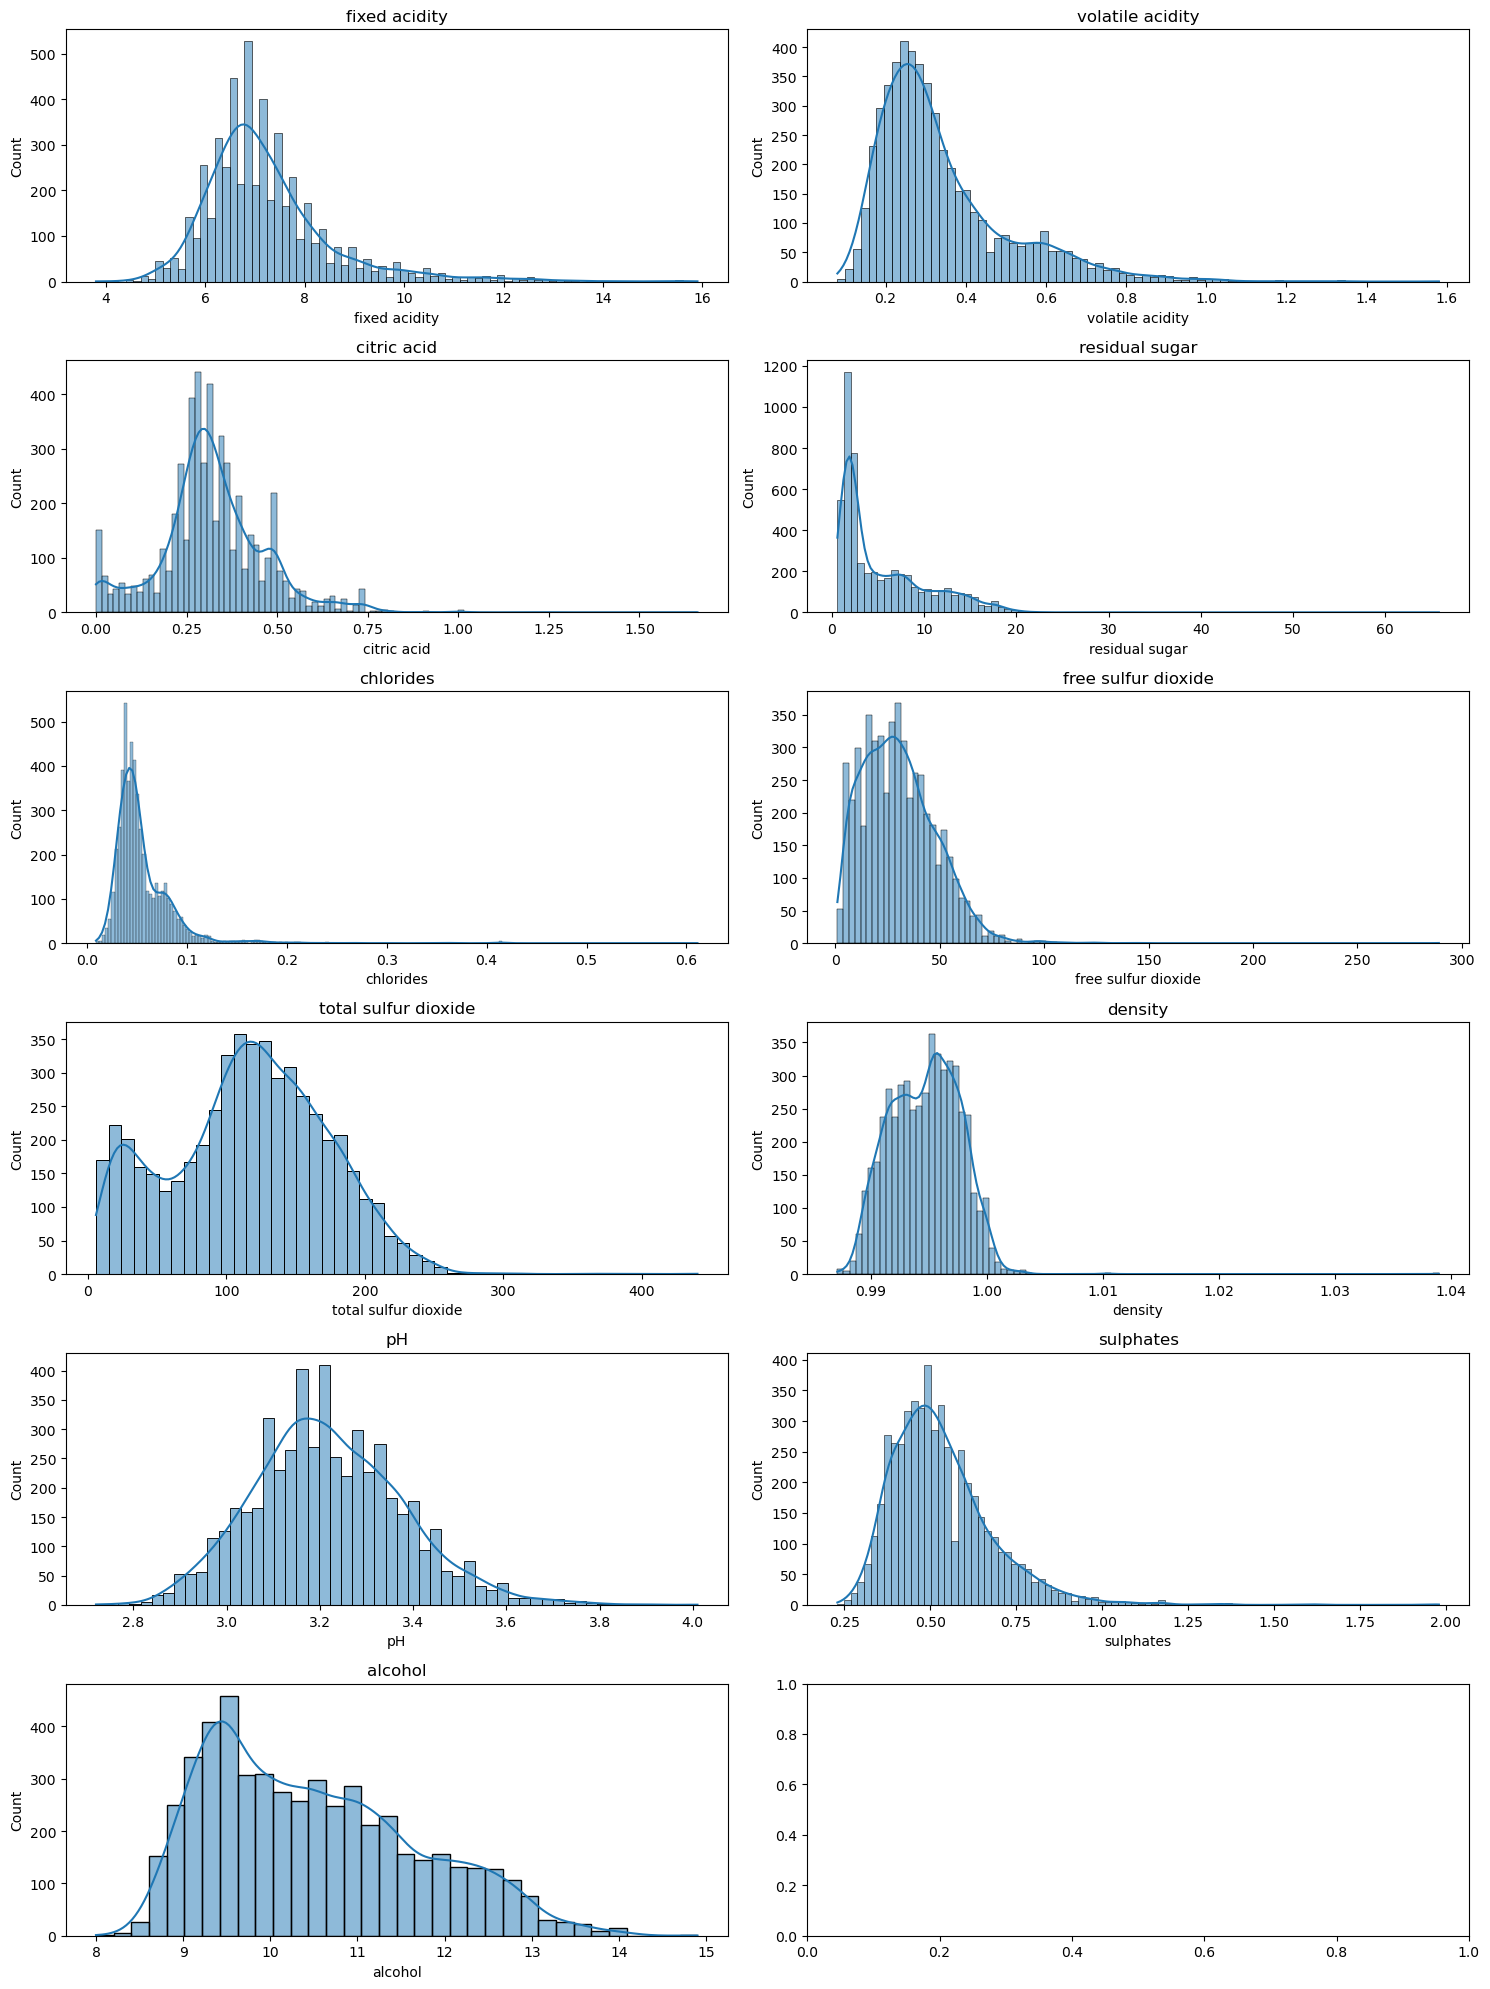

In [77]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
columns = X_train.columns[:-1]  # excluding the last column

for col, ax in zip(columns, axes.ravel()):
    sns.histplot(X_train[col], ax=ax, kde=True)  # using histogram with Kernel Density Estimation
    ax.set_title(col)  # setting title for each subplot

plt.tight_layout()
plt.show()


General Observations:

The positively skewed distributions (like volatile acidity, residual sugar, and chlorides) suggest that while there's a common "average" value, there are also some wines with exceptionally high values in these categories.

Distributions with multiple modes (like citric acid) suggest that there might be different categories or types of wine within the dataset, each with its own typical value for these features.

Features like density are very narrowly distributed, meaning that there's not much variation among wines in this particular feature.



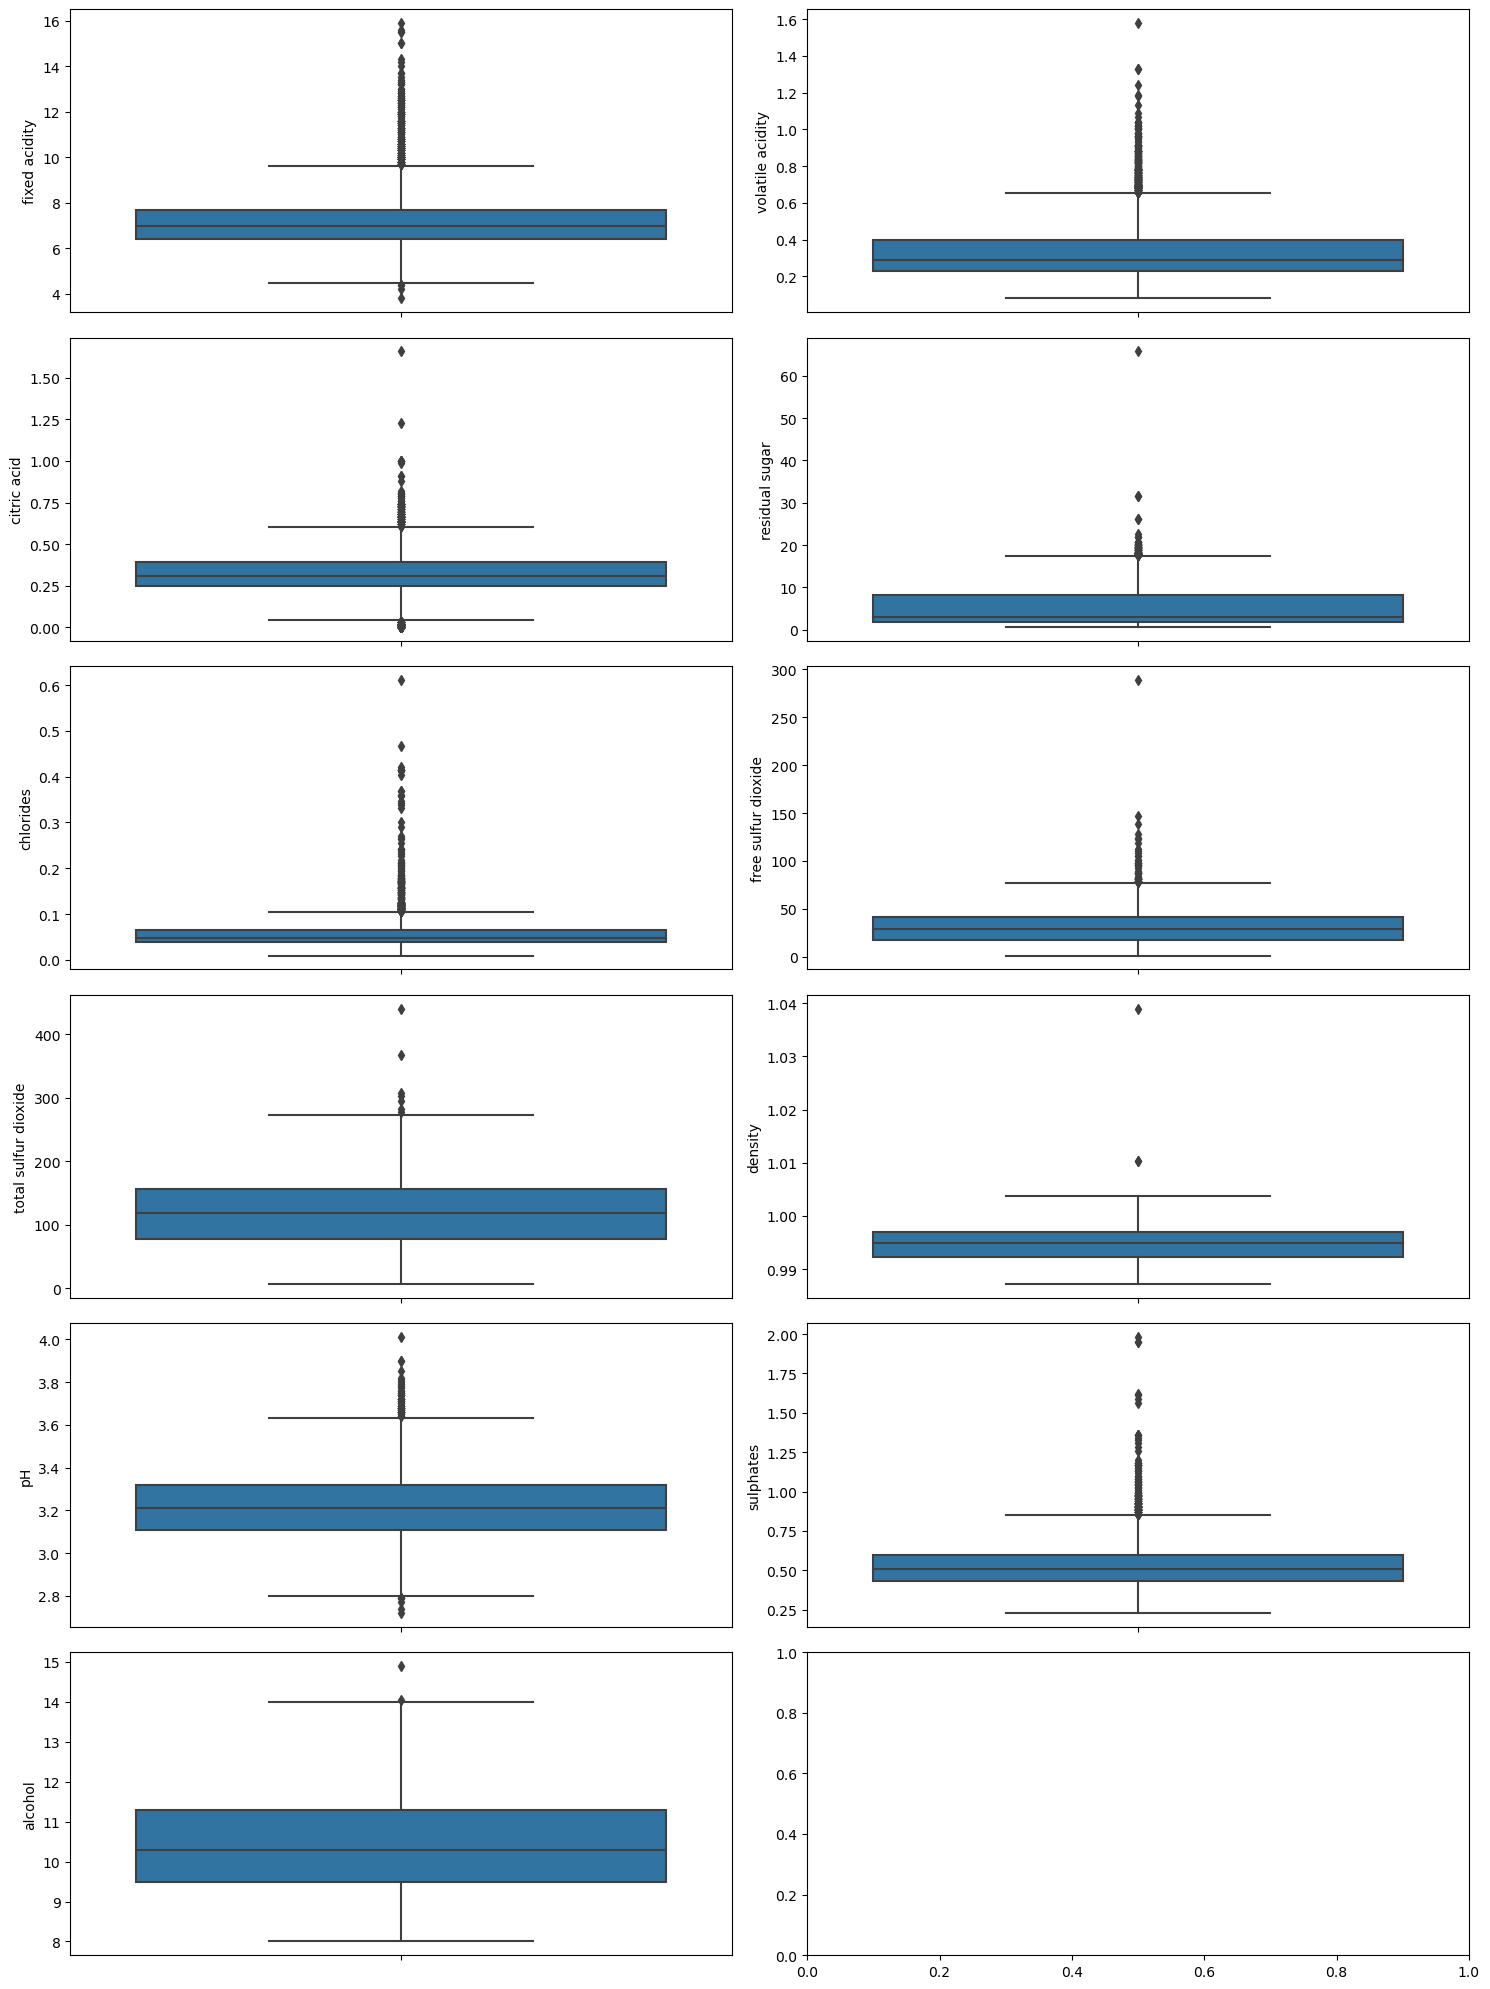

In [78]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
columns = X_train.columns[:-1]  # excluding 'wine_type'

for col, ax in zip(columns, axes.ravel()):
    sns.boxplot(data=X_train, y=col, ax=ax)

plt.tight_layout()
plt.show()


General Observations:

Many of the attributes (like volatile acidity, residual sugar, chlorides, sulphates) have a number of outliers, particularly on the higher end. Depending on the objective of your analysis, you may want to investigate these outliers further to determine if they're anomalies or genuine data points.
The spread (or range) of values varies greatly between attributes. For instance, total sulfur dioxide ranges from 0 to nearly 300, while density has a very narrow range.
It's also important to note that box plots do not show the density or number of data points, so it might be helpful to supplement these with histograms or density plots to get a sense of the data's distribution.

In [79]:
import pandas as pd
from scipy.stats import zscore
X_outlier = X_train.drop(columns=['wine_type'])
# Assuming X_train is a pandas DataFrame
abs_z_scores = abs(zscore(X_outlier))

# Set a threshold for identifying outliers, e.g., 3 standard deviations away
threshold = 3

# Create a boolean mask for rows with outliers
outliers = (abs_z_scores > threshold).any(axis=1)

# Filter the DataFrame to get rows with outliers
outlier_rows = X_train[outliers]

# Display the rows with outliers
print(outlier_rows.columns)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'wine_type'],
      dtype='object')


In [80]:
stats_df = X_train.describe()
stats_df 

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5197.000000       5197.000000  5197.000000     5197.000000   
mean        7.225120          0.339985     0.319394        5.424514   
std         1.307621          0.165723     0.145111        4.783221   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        2.900000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5197.000000          5197.000000           5197.000000  5197.000000   
mean      0.055919            30.511064            115.650952     0.994698   
std       0.034038            17.818109             56.619632     0.003006   
min       0.009000             1.000000              6.000000     0.987130   
25%       0.038000            17.000000             77.000000     0.992350   
50%       0.047000            29.000000            118.000000     0.994880   
75%       0.065000            41.000000            156.000000     0.996920   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  5197.000000  5197.000000  5197.000000  
mean      3.218488     0.533465    10.493653  
std       0.161035     0.151056     1.192345  
min       2.720000     0.230000     8.000000  
25%       3.110000     0.430000     9.500000  
50%       3.210000     0.510000    10.300000  
75%       3.320000     0.600000    11.300000  
max       4.010000     1.980000    14.900000

In [81]:
numerical_attrs = []
nominal_attrs = []
categorical_attrs = []

for column_name, dtype in X_data_types.items():
    if dtype == 'float64':
        numerical_attrs.append(column_name)
    elif dtype == 'object':
        nominal_attrs.append(column_name)
    elif dtype == 'int64':
        categorical_attrs.append(column_name)

print("Numerical attributes:")
print(', '.join(numerical_attrs))

print("\nNominal attributes:")
print(', '.join(nominal_attrs))

print("\nCategorical attributes:")
print(', '.join(categorical_attrs))


Numerical attributes:
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol

Nominal attributes:
wine_type

Categorical attributes:



In [82]:
#should i remove outliers
#when should i take a split of this data for validaton
    #read about the split
    

In [83]:
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=True))  # Assuming your numerical data isn't sparse
])

nominal_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder()),  # Use OneHotEncoder
    ('scaler', StandardScaler(with_mean=False))  # Set with_mean to False here
])

categorical_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder()),  # Use OneHotEncoder
    ('scaler', StandardScaler(with_mean=False))  # Set with_mean to False here
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_attrs),
        ('nom', nominal_pipeline, nominal_attrs),
        ("cat", categorical_pipeline, categorical_attrs)
    ]
)

In [84]:

model = Pipeline([
    ('preprocessor', preprocessor),  # Using the preprocessor you defined earlier
    ('estimator', ElasticNet())  # Default instantiation of ElasticNet
])


num_observations = len(X_train)

param_grid = {
    'estimator__alpha': np.logspace(-4, 4, 10),
    'estimator__l1_ratio': np.linspace(0.01, 1.0, 10)
}

In [85]:
grid_search = GridSearchCV(model, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
best_score = grid_search.best_score_
print("Best score:", best_score)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+03, tolerance: 3.649e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.045e+03, tolerance: 3.614e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.054e+03, toleranc

Best hyperparameters: {'estimator__alpha': 0.005994842503189409, 'estimator__l1_ratio': 0.01}
Best score: 0.28010047563332263


In [86]:
best_estimator = grid_search.best_estimator_
best_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol']),
                                                 ('nom',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['wine_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  [])])),
                ('estimator',
                 ElasticNet(alpha=0.005994842503189409, l1_ratio=0.01))])

In [87]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.593790      0.758392         0.010671        0.006231   
1        0.033159      0.014138         0.006647        0.004778   
2        0.026851      0.009579         0.005085        0.002631   
3        0.016427      0.001852         0.005066        0.002507   
4        0.016370      0.004074         0.005192        0.003518   
..            ...           ...              ...             ...   
95       0.009130      0.001906         0.003770        0.001448   
96       0.012227      0.004933         0.005423        0.002977   
97       0.009084      0.002205         0.005407        0.002715   
98       0.010984      0.003026         0.003458        0.001750   
99       0.008075      0.001434         0.003783        0.001261   

   param_estimator__alpha param_estimator__l1_ratio  \
0                  0.0001                      0.01   
1                  0.0001                      0.12   
2                  0.0001                      0.23   
3                  0.0001                      0.34   
4                  0.0001                      0.45   
..                    ...                       ...   
95                10000.0                      0.56   
96                10000.0                      0.67   
97                10000.0                      0.78   
98                10000.0                      0.89   
99                10000.0                       1.0   

                                               params  split0_test_score  \
0   {'estimator__alpha': 0.0001, 'estimator__l1_ra...           0.248276   
1   {'estimator__alpha': 0.0001, 'estimator__l1_ra...           0.248314   
2   {'estimator__alpha': 0.0001, 'estimator__l1_ra...           0.248353   
3   {'estimator__alpha': 0.0001, 'estimator__l1_ra...           0.248392   
4   {'estimator__alpha': 0.0001, 'estimator__l1_ra...           0.248432   
..                                                ...                ...   
95  {'estimator__alpha': 10000.0, 'estimator__l1_r...          -0.000067   
96  {'estimator__alpha': 10000.0, 'estimator__l1_r...          -0.000067   
97  {'estimator__alpha': 10000.0, 'estimator__l1_r...          -0.000067   
98  {'estimator__alpha': 10000.0, 'estimator__l1_r...          -0.000067   
99  {'estimator__alpha': 10000.0, 'estimator__l1_r...          -0.000067   

    split1_test_score  split2_test_score  split3_test_score  \
0        2.912342e-01           0.280641           0.326686   
1        2.912309e-01           0.280639           0.326682   
2        2.912274e-01           0.280637           0.326679   
3        2.912237e-01           0.280634           0.326676   
4        2.912201e-01           0.280632           0.326672   
..                ...                ...                ...   
95      -3.236009e-07          -0.000304          -0.000596   
96      -3.236009e-07          -0.000304          -0.000596   
97      -3.236009e-07          -0.000304          -0.000596   
98      -3.236009e-07          -0.000304          -0.000596   
99      -3.236009e-07          -0.000304          -0.000596   

    split4_test_score  split5_test_score  split6_test_score  \
0            0.284755           0.259620           0.275617   
1            0.284742           0.259622           0.275617   
2            0.284729           0.259623           0.275618   
3            0.284716           0.259625           0.275619   
4            0.284702           0.259626           0.275620   
..                ...                ...                ...   
95          -0.000131          -0.000892          -0.000107   
96          -0.000131          -0.000892          -0.000107   
97          -0.000131          -0.000892          -0.000107   
98          -0.000131          -0.000892          -0.000107   
99          -0.000131          -0.000892          -0.000107   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0            0.2731

In [88]:
# Fit the model on your training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol']),
                                                 ('nom',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['wine_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  [])])),
                ('estimator', ElasticNet())])

In [89]:
X_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1916            6.6              0.25         0.36             8.1      0.045   
947             8.5              0.16         0.35             1.6      0.039   
877             6.0              0.28         0.34             1.6      0.119   
2927            7.0              0.31         0.31             9.1      0.036   
6063            8.5              0.44         0.50             1.9      0.369   
...             ...               ...          ...             ...        ...   
3772            6.3              0.24         0.29            13.7      0.035   
5191            6.9              0.36         0.25             2.4      0.098   
5226           13.4              0.27         0.62             2.6      0.082   
5390            8.9              0.40         0.51             2.6      0.052   
860             8.1              0.27         0.35             1.7      0.030   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1916                 54.0                 180.0  0.99580  3.08       0.42   
947                  24.0                 147.0  0.99350  2.96       0.36   
877                  33.0                 104.0  0.99210  3.19       0.38   
2927                 45.0                 140.0  0.99216  2.98       0.31   
6063                 15.0                  38.0  0.99634  3.01       1.10   
...                   ...                   ...      ...   ...        ...   
3772                 53.0                 134.0  0.99567  3.17       0.38   
5191                  5.0                  16.0  0.99640  3.41       0.60   
5226                  6.0                  21.0  1.00020  3.16       0.67   
5390                 13.0                  27.0  0.99500  3.32       0.90   
860                  38.0                 103.0  0.99255  3.22       0.63   

      alcohol wine_type  
1916      9.2     white  
947      10.0     white  
877      10.2     white  
2927     12.0     white  
6063      9.4       red  
...       ...       ...  
3772     10.6     white  
5191     10.1       red  
5226      9.7       red  
5390     13.4       red  
860      10.4     white  

[5197 rows x 12 columns]

In [90]:
y_train

1916    5
947     5
877     6
2927    7
6063    5
       ..
3772    6
5191    6
5226    6
5390    7
860     8
Name: quality, Length: 5197, dtype: int64

In [91]:
y_pred = model.predict(X_train)
len(y_pred)

5197

# Identify additional data that would be useful
### (go back to “Get the Data”).

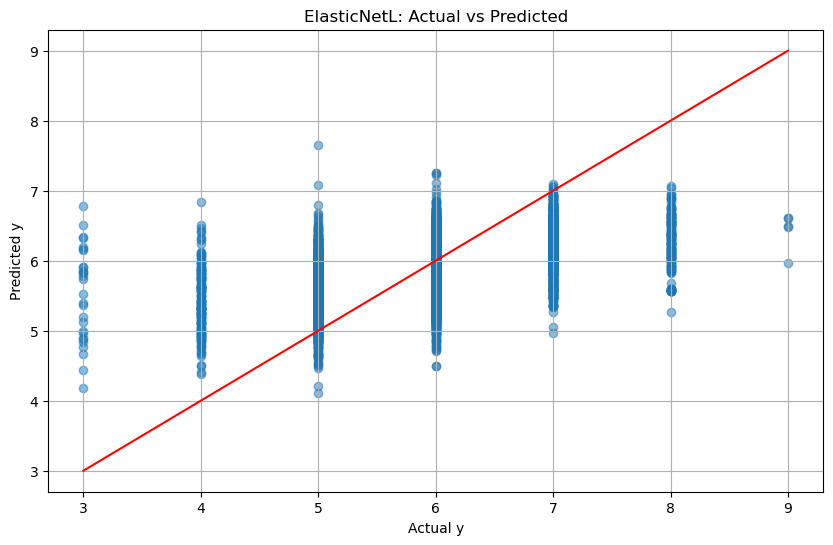

In [92]:
# Now you can generate predictions on your training data or any other data
y_pred = best_estimator.predict(X_train)

# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Line of perfect prediction
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('ElasticNetL: Actual vs Predicted')
plt.grid(True)
plt.show()


In [93]:
best_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol']),
                                                 ('nom',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['wine_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder()),
                                                                  ('scaler',
                                                                   StandardScaler(with_mean=False))]),
                                                  [])])),
                ('estimator',
                 ElasticNet(alpha=0.005994842503189409, l1_ratio=0.01))])

In [94]:
y_pred

array([5.46640584, 5.56174416, 5.54739596, ..., 5.84101284, 6.94355473,
       5.99926542])

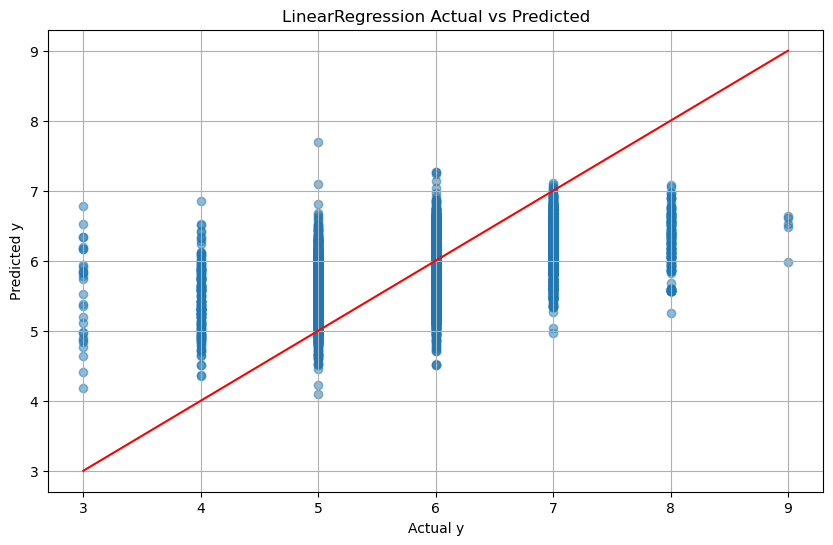

In [95]:
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', LinearRegression())
])

# Fit the model on your training data
model.fit(X_train, y_train)

# Generate predictions on your training data or any other data
y_pred = model.predict(X_train)

# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Line of perfect prediction
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('LinearRegression Actual vs Predicted')
plt.grid(True)
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, best_estimator.predict(X_train))
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.55


In [97]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, best_estimator.predict(X_train))
print(f"R-squared: {r2:.2f}")


R-squared: 0.29


In [98]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_estimator, X_train, y_train, n_repeats = 30, random_state = 42)
perm_importance = dict(zip(X_train.columns, result.importances_mean))

In [99]:
for feature, importance in sorted(perm_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

alcohol: 0.21607067474591754
residual sugar: 0.176565986741594
density: 0.15654763807567668
volatile acidity: 0.15336792126662063
wine_type: 0.04438348632023203
sulphates: 0.029840881816877805
free sulfur dioxide: 0.02368133832899342
total sulfur dioxide: 0.02229208927998657
fixed acidity: 0.019592374901951447
pH: 0.009686407908671127
chlorides: 0.0018776970794512978
citric acid: 7.582760948268893e-05


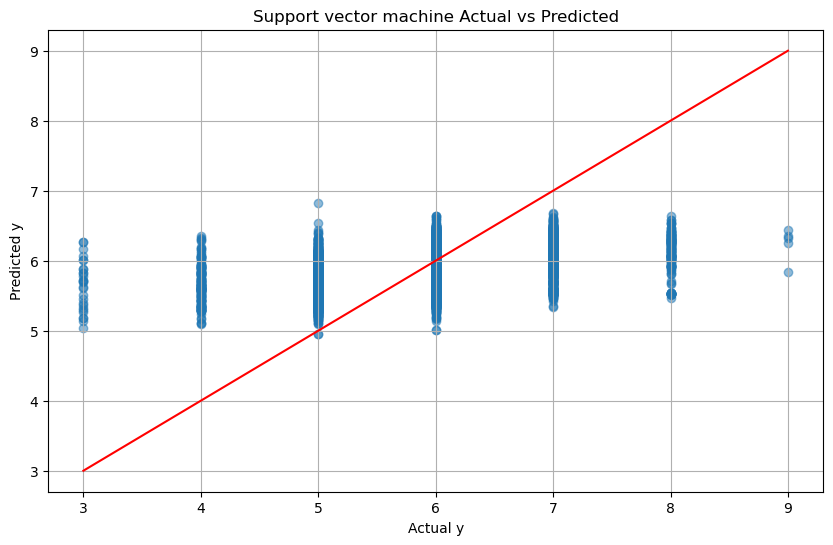

In [100]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# Assuming preprocessor is already defined somewhere in your code
#tried these
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

model = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', Lasso(alpha=.1))  # You can change the kernel as needed. Other common choices are 'rbf', 'poly', etc.
])

# Fit the model on your training data
model.fit(X_train, y_train)

# Generate predictions on your training data or any other data
y_pred = model.predict(X_train)

# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Line of perfect prediction
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Support vector machine Actual vs Predicted')
plt.grid(True)
plt.show()


In [101]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, model.predict(X_train))
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.60


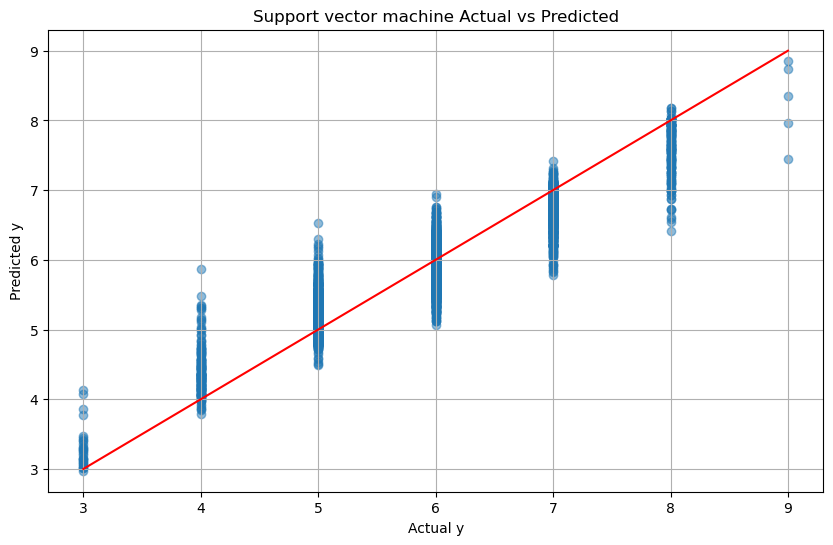

In [102]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
# Assuming preprocessor is already defined somewhere in your code
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline([
    ('preprocessor', preprocessor),
    ('estimator', GradientBoostingRegressor(n_estimators=100, learning_rate=0.4, max_depth=5, random_state=21))  # You can change the kernel as needed. Other common choices are 'rbf', 'poly', etc.
])

# Fit the model on your training data
model.fit(X_train, y_train)

# Generate predictions on your training data or any other data
y_pred = model.predict(X_train)

# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Line of perfect prediction
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Support vector machine Actual vs Predicted')
plt.grid(True)
plt.show()


In [103]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, model.predict(X_train))
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.10
